# Value at Risk

In [1]:
import chainladder as cl

This example uses the `BootstrapODPSample` to simulate new triangles that
are then used to simulate an IBNR distribution from which we can do
Value at Risk percentile lookups.


In [2]:
# Load triangle
triangle = cl.load_sample('genins')

# Create 1000 bootstrap samples of the triangle
resampled_triangles = cl.BootstrapODPSample(random_state=42).fit_transform(triangle)

# Create 1000 IBNR estimates
sim_ibnr = cl.Chainladder().fit(resampled_triangles).ibnr_.sum('origin')

# X - mu
sim_ibnr = (sim_ibnr - sim_ibnr.mean()).to_frame().sort_values()

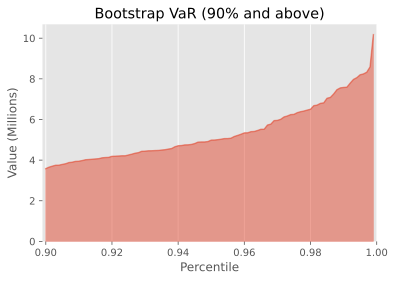

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot data
fig, ax = plt.subplots()
sim_ibnr.index = [item/1000 for item in range(1000)]
(sim_ibnr/1e6).loc[0.90:].plot(kind='area', alpha=0.5,
    title='Bootstrap VaR (90% and above)', ax=ax).set(
    xlabel='Percentile', xlim=(0.899, 1.0), ylabel='Value (Millions)');
ax.grid(axis='y')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

In [5]:
from myst_nb import glue
glue("plot_value_at_risk", ax.get_figure(), display=False)